# Recurrent NN: predicting between Markov chains

In this nore book, we're going to build and train a Recurrent neural network to determine which one of four markov chains our data is coming from.

It will take it's input from k sequential discrete time steps which will correspond to a random walk of one of the markov chains.

We design the markov chains as follows:

Chain A:

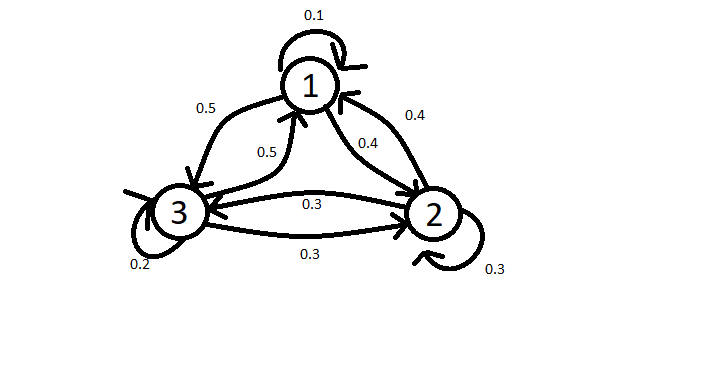

Chain B:

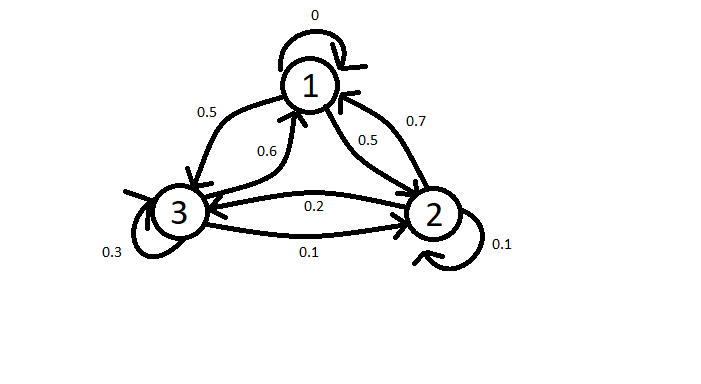

Chain C:

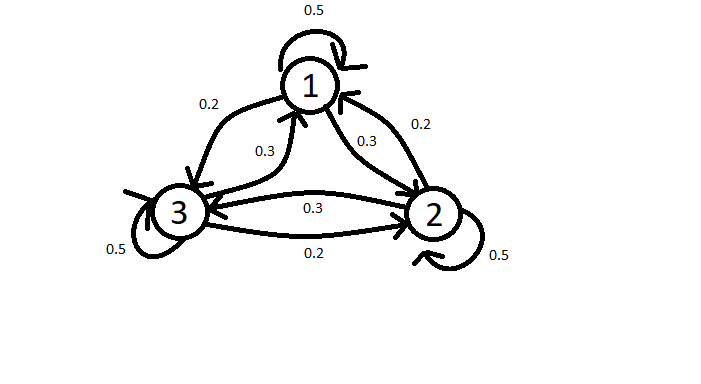


The transition matrices for these chains are...



Chains 1 and 2 are more inclined to move between states, and chain 3 is more inclined to remain at a given state.

As these chains ... we know that they have stationary distributions, we can find them with the help of the eigenvectors of the transition matrices

This means that they will have distinct long term behaviour for each chain and the hope is that this will make the chains easier to identify in the long term for the markov chains. This will be especially important when we begin the random walks from rendomly selected initial states, as there will be much more initial variance between samples. This variance should reduce over time due to this property.

The markov chain functions will return a string with the walk

In [8]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [30]:
def ChainA(init_state, n):
    '''
    runs a random walk of n steps from
    an initial state in our markov chain
    described above.
    '''
    #set state = init_state
    i = init_state
    #define transition matrix
    Pij = np.array([[0.1,0.4,0.5], [0.4,0.3,0.3], [0.5,0.3,0.2]])
    #initalise the walk with the initial step
    walk = [i]    
    for k in range (0,n):
        #create cumsum of Pij for random number selection
        Pi_cum = np.cumsum(Pij[i])
        #select a uniformly random number between 0 and 1
        rand = random.uniform(0,1)
        for j in range(0,len(Pij[0])):
            if rand <= Pi_cum[j]:
                #then state i goes to state j
                i = j
                walk.append(j)
                break
    return np.array(walk)

def ChainB(init_state, n):
    '''
    Chain A function with transition matrix for Chain B
    '''
    i = init_state
    #transition matrix for Chain B
    Pij = np.array([[0,0.5,0.5], [0.7,0.1,0.2], [0.6,0.1,0.3]])
    walk = [i]    
    for k in range (0,n):
        Pi_cum = np.cumsum(Pij[i])
        rand = random.uniform(0,1)
        for j in range(0,len(Pij[0])):
            if rand <= Pi_cum[j]:
                i = j
                walk.append(j)
                break
    return np.array(walk)

def ChainC(init_state, n):
    '''
    Chain A function with transition matrix for Chain C
    '''
    i = init_state
    #transition matrix for Chain C
    Pij = np.array([[0.5,0.2,0.3], [0.2,0.5,0.3], [0.3,0.2,0.4]])
    walk = [i]    
    for k in range (0,n):
        Pi_cum = np.cumsum(Pij[i])
        rand = random.uniform(0,1)
        for j in range(0,len(Pij[0])):
            if rand <= Pi_cum[j]:
                i = j
                walk.append(j)
                break
    return np.array(walk)

In [50]:
print(sum(ChainB(0,200)))
for n in range(0,100):
    sumA = np.sum(ChainA(0,200))
    sumB = np.sum(ChainB(0,200))
    sumC = np.sum(ChainC(0,200))

print(sumA/100, sumB/100, sumC/100)
    

190
2.0 1.93 1.72


In [52]:
print(ChainB(0,3))

[0 2 1 0]


## Initialisation from node 1 always
### Training
### Measuring effectiveness of the network for variable walk lengths


## Random node initialisation